### **Note** : Data is uploaded in kaggle kernel


## **Importing required libraries (Dependencies)**

In [1]:
import os
import cv2
import random 
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential

## **Listing out the folders of training and testing images**

In [2]:
print(os.listdir("../input/state-farm-distracted-driver-detection/imgs"))

['test', 'train']


## **Creating varibles having path of training and testing directories**

In [3]:
training_dir = '../input/state-farm-distracted-driver-detection/imgs/train'
testing_dir = '../input/state-farm-distracted-driver-detection/imgs/test'

## **Dictionary with classes and habits**

In [4]:
class_dict = {'classes': ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'],
              'habits' : ['safe driving','texting - right',
                          'talking on the phone - right','texting - left',
                          'talking on the phone - left','operating the radio',
                          'drinking','reaching behind','hair and makeup','talking to passenger']}

## **Preparing training data :**

In [5]:
# Creating empty list to append the training data
training_data = []

## **Creating the list of training data with image and its class**

In [6]:
def create_training_data():

    # Creating the path for each in category as well as image 
    # Reading each image in gray scale and resizing it to 240 x 240
    # Appending the resized image and its class in list (img_100026.jpg,'c0')
    # Returning the len of training data
    
    for category in class_dict['classes'] :
        path = os.path.join(training_dir,category)
        class_idx = class_dict['classes'].index(category)
        
        for image in os.listdir(path):
            image_path = os.path.join(path,image)
            img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img,(240,240))
            training_data.append([resized_img,class_idx])
    return len(training_data)

In [7]:
create_training_data()

22424

## **Preparing the testing data :**

In [8]:
# Creating empty list to append the testing data
testing_data = []

## **Creating the list of testing data with image and resized image**

In [9]:
def create_testing_data():
    
    # Creating the path for each image
    # Reading each image in gray scale and resizing it to 240 x 240
    # Appending the image and resized image 
    # Returning the len of testing data
    
    for image in os.listdir(testing_dir):
        image_path = os.path.join(testing_dir,image)
        img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        resized_img = cv2.resize(img,(240,240))
        testing_data.append([image,resized_img])
    return len(testing_data)

In [10]:
create_testing_data()

79726

## **Shuffling the training data randomly**

In [11]:
training_data = random.sample(training_data, len(training_data))

In [12]:
# Creating two list one with features and other with labels
x = []
labels = []
for features, label in training_data:
    x.append(features)
    labels.append(label)

## **One-hot Encoding**

In [13]:
# E.g. --> if class 0 is predicted then y will be [1,0,0,0,0,0,0,0,0,0]

y = np_utils.to_categorical(labels,num_classes=len(class_dict['classes']))

## **Reshaping x to 240 x 240 x1**

In [14]:
x = np.array(x).reshape(-1,240,240,1)
x[0].shape

(240, 240, 1)

## **Shape of x and y**

In [15]:
x.shape,y.shape

((22424, 240, 240, 1), (22424, 10))

## **Splitting the data into 75%-25% (training=75,testing=25)**

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=50)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16818, 240, 240, 1), (5606, 240, 240, 1), (16818, 10), (5606, 10))

## **Model Architecture**

In [18]:
model = Sequential()

In [19]:
####################### CNN Layer 1 ##################################

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(240,240,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.2))

####################### CNN Layer 2 ##################################

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))

####################### CNN Layer 3 ##################################

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))

####################### Dense Layer & Output Layer ####################

model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

## **Summary of Model :**

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 238, 238, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 238, 238, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 238, 238, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 119, 119, 64)      1

## **Compiling the model**

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [22]:
# Stop model if accuracy of the model doesn't changes by more than 0.01 
# Patience = 5 : After each 5 epochs if no improvement is there then training will be stopped.

es = EarlyStopping(monitor='val_acc',patience= 5,min_delta=0.01)

## **Fitting the Model:**
1. Batch Size = 128
2. Epochs = 12

In [23]:
 model.fit(x_train,y_train,batch_size=128,epochs=12,verbose=1,validation_data=(x_test,y_test),callbacks=[es])

Epoch 1/12
132/132 [==============================] - 53s 404ms/step - loss: 1.2938 - acc: 0.5953 - val_loss: 0.3049 - val_acc: 0.9167
Epoch 2/12
132/132 [==============================] - 51s 387ms/step - loss: 0.1949 - acc: 0.9413 - val_loss: 0.0517 - val_acc: 0.9850
Epoch 3/12
132/132 [==============================] - 51s 388ms/step - loss: 0.0840 - acc: 0.9750 - val_loss: 0.0431 - val_acc: 0.9886
Epoch 4/12
132/132 [==============================] - 51s 387ms/step - loss: 0.0607 - acc: 0.9815 - val_loss: 0.0248 - val_acc: 0.9923
Epoch 5/12
132/132 [==============================] - 51s 387ms/step - loss: 0.0573 - acc: 0.9819 - val_loss: 0.0279 - val_acc: 0.9945
Epoch 6/12
132/132 [==============================] - 51s 388ms/step - loss: 0.0550 - acc: 0.9839 - val_loss: 0.1317 - val_acc: 0.9600
Epoch 7/12
132/132 [==============================] - 51s 388ms/step - loss: 0.0455 - acc: 0.9863 - val_loss: 0.0233 - val_acc: 0.9943


## **Predicting on the testing data :**

 class 5 --> operating the radio


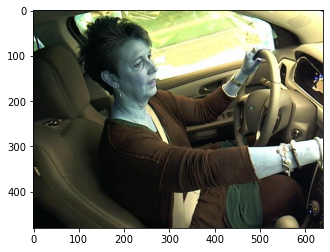

In [36]:
import matplotlib.pyplot as plt

testing_image = np.array(testing_data[5][1]).reshape(-1,240,240,1)
preds = model.predict(testing_image)
class_id = np.argmax(preds[0])
class_output = model.output[:, class_id]
path = '../input/state-farm-distracted-driver-detection/imgs/test'+'/'+testing_data[5][0]
img_array = cv2.imread(path)
plt.imshow(img_array)
print(' class '+str(class_id)+' --> '+class_dict['habits'][class_id])
